In [1]:
import matplotlib.pyplot as plt
import numpy             as np
import pickle

In [32]:
file_path     = 'c:/Users/byecs/Downloads/temp/sims/revised_rrel/'
data_filename = 'c:/Users/byecs/Downloads/temp/sims/revised_rrel/MaxwellHardSphere_revised_rel_data.pkl'
data_file     = open(data_filename,'rb')
sim_data      = pickle.load(data_file)
print(sim_data)
data_file.close()
speeds = sim_data['raw_data']

{'raw_data': array([[1377.30692004, 1377.30692004, 1377.30692004, ..., 1377.30692004,
        1377.30692004, 1377.30692004],
       [1377.30692004, 1377.30692004, 1377.30692004, ..., 1391.72210668,
        1377.30692004, 1377.30692004],
       [1377.30692004, 1377.30692004, 1377.30692004, ..., 1495.51198884,
        1377.30692004, 1377.30692004],
       ...,
       [1152.04000059, 1198.3476666 ,  904.68521484, ..., 1342.31286739,
         686.73859552, 2237.45514574],
       [1152.04000059, 1198.3476666 ,  904.68521484, ..., 1342.31286739,
         686.73859552, 2237.45514574],
       [1152.04000059, 1198.3476666 ,  904.68521484, ..., 1749.55367501,
         686.73859552, 2237.45514574]]), 'meta_data': '\n  Generated by Maxwell_Hardspheres_revised_rel.py.  This simulation of Maxwell hard \n  spheres uses the original algorithm of Bruce Sherwood with a tweak at the bounce \n  to use the relative position at contact, not overlap, point.\n', 'name': 'MHS_original'}


In [33]:
def MB_dist(vs):
    T       = 300            #Kelvin (K)
    k_b     = 1.4e-23        #J/K
    N_A     = 6.0221408e+23
    He_mm   = 4e-3           #kilograms/mole
    He_mass = He_mm/N_A      #kilograms
    
    coeff = np.power((He_mass/2.0/np.pi/k_b/T),1.5)*4*np.pi*vs**2
    body  = np.exp(-He_mass*vs**2/2.0/k_b/T)
    
    return coeff*body

vs = np.arange(0,3000,10)
mb = MB_dist(vs)

Text(0, 0.5, 'Probability of Occurrence')

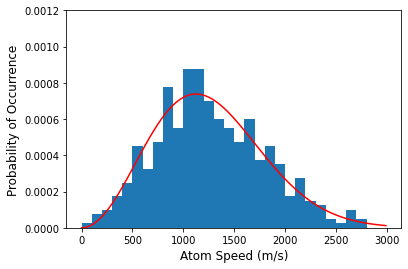

In [34]:
plt.hist(speeds[200],bins=np.arange(0,3000,100),density=True);
plt.plot(vs,mb,'r-')
plt.ylim([0,0.0012])
plt.xlabel('Atom Speed (m/s)',fontsize=12)
plt.ylabel('Probability of Occurrence',fontsize=12)

(array([0.00057001, 0.00057001, 0.00152003, 0.00304006, 0.00494011,
        0.00449676, 0.00399009, 0.00335674, 0.00202671, 0.00082335]),
 array([1054.5039621 , 1093.97680372, 1133.44964534, 1172.92248696,
        1212.39532858, 1251.86817021, 1291.34101183, 1330.81385345,
        1370.28669507, 1409.75953669, 1449.23237831]),
 <BarContainer object of 10 artists>)

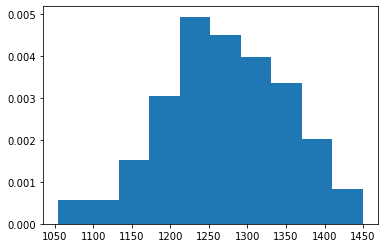

In [35]:
#not the result I thought because what I am actually doing in this cell is to invoke the central limit theorem
#thus I get a gaussian distribution centered on the average MB speed
plt.hist(np.average(speeds[:,:],axis=0),density=True)

In [36]:
aves  = np.average(speeds,axis=1)
maxes = np.max(speeds,axis=1) 
mins  = np.min(speeds,axis=1)
ergs  = np.sum(np.array([speeds[i,:]**2 for i in range(2001)]),axis=1)

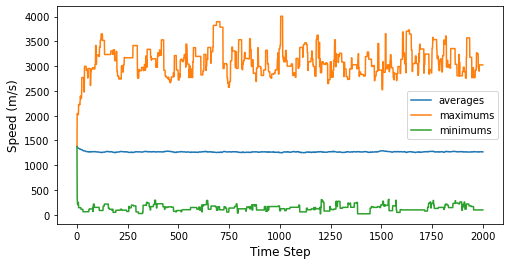

In [37]:
fig = plt.figure(figsize=(8,4))
ax  = fig.add_subplot(1,1,1)
ax.plot(aves, label='averages')
ax.plot(maxes,label='maximums')
ax.plot(mins, label='minimums')
ax.set_xlabel('Time Step',fontsize=12)
ax.set_ylabel('Speed (m/s)',fontsize=12)
ax.legend()
fig.savefig(file_path+'Speed_statistics.png',dpi=300)

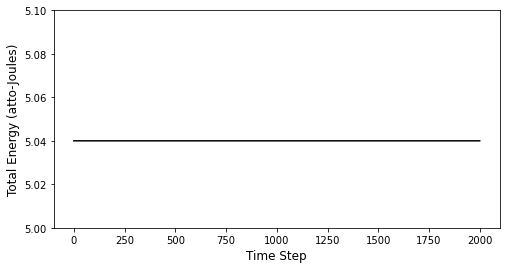

In [38]:
N_A     = 6.0221408e+23
He_mm   = 4e-3           #kilograms/mole
He_mass = He_mm/N_A      #kilograms
fig = plt.figure(figsize=(8,4))
ax  = fig.add_subplot(1,1,1)
ax.plot(He_mass*ergs/1e-18,'k-')
ax.set_ylim([5.0,5.1])
ax.set_xlabel('Time Step',fontsize=12)
ax.set_ylabel('Total Energy (atto-Joules)',fontsize=12)
fig.savefig(file_path+'Energy_conservation.png',dpi=300)

In [39]:
bins = np.arange(0,3000,100)
width = 0.9 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

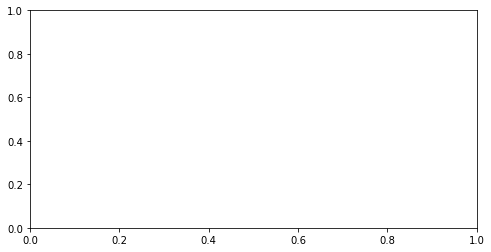

In [40]:
fig = plt.figure(figsize=(8,4))
ax  = fig.add_subplot(1,1,1)
for i in range(len(speeds)):
    hists = np.zeros(len(bins)-1)
    for speed in speeds[0:i+1]:
        curr_hist = np.histogram(speed,bins,density=True)
        hists     = hists + curr_hist[0] 
    hists = hists/(i+1)
    ax.bar(center, hists, align='center', width=width)
    ax.plot(vs,mb,'r-')
    ax.set_ylim([0,0.0010])
    ax.set_xlabel('Atom Speed (m/s)',fontsize=12)
    ax.set_ylabel('Probability of Occurrence',fontsize=12)
    frame_number = f'{i:05}'+'.png'
    fig.savefig(file_path+'original_ave_'+frame_number,dpi=300)
    ax.cla()

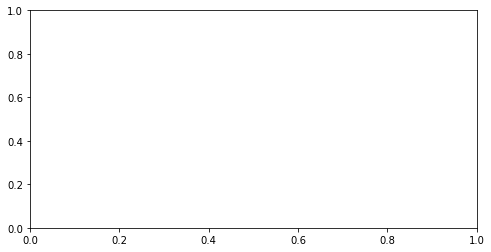

In [41]:
fig = plt.figure(figsize=(8,4))
ax  = fig.add_subplot(1,1,1)
for i in range(len(speeds)):
    ax.hist(speeds[i],bins=bins,density=True)
    ax.plot(vs,mb,'r-')
    ax.set_ylim([0,0.0010])
    ax.set_xlabel('Atom Speed (m/s)',fontsize=12)
    ax.set_ylabel('Probability of Occurrence',fontsize=12)
    frame_number = f'{i:05}'+'.png'
    fig.savefig(file_path+'original_instantenous_'+frame_number,dpi=300)
    ax.cla()